In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import h5py

from nbodykit.lab import *
from mpl_toolkits.axes_grid1 import make_axes_locatable

/home/toshiba/Software/Anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [8]:
filename='Bsk_sim.h5'
f = h5py.File(filename, 'r')
den_sim=np.array(f['den'])
fa_sim=np.array(f['fa'])
f.close()

filename='Bsk_sdss.h5'
f = h5py.File(filename, 'r')
den_sdss=np.array(f['den'])
fa_sdss=np.array(f['fa'])
f.close()

filename='Bsk_sdss_rand.h5'
f = h5py.File(filename, 'r')
den_rand=np.array(f['den'])
fa_rand=np.array(f['fa'])
f.close()

filename='Bsk_TNG.h5'
f = h5py.File(filename, 'r')
den_TNG=np.array(f['den'])
fa_TNG=np.array(f['fa'])
f.close()

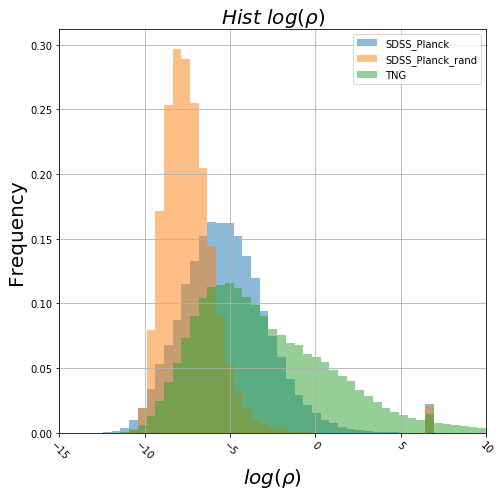

In [3]:
denlog_sim=np.log(den_sim)
denlog_sdss=np.log(den_sdss)
denlog_rand=np.log(den_rand)
denlog_TNG=np.log(den_TNG)
fig= plt.figure(figsize=(7,7))
ax = fig.add_subplot(1, 1, 1)
major_ticks = np.arange(-25,25, 5)
ax.set_xticks(major_ticks)
ax.grid(which='both')

# plt.hist(denlog_sim,bins=np.linspace(-15,10,50),ls='dashed', alpha = 0.5,label="Simulation",density=True)
plt.hist(denlog_sdss,bins=np.linspace(-15,10,50),ls='dotted', alpha = 0.5,label="SDSS_Planck",density=True)
plt.hist(denlog_rand,bins=np.linspace(-15,10,50),ls='dashed', alpha = 0.5,label="SDSS_Planck_rand",density=True)
plt.hist(denlog_TNG,bins=np.linspace(-15,10,50),ls='dashed', alpha = 0.5,label="TNG",density=True)
plt.title(r'$Hist\,\,log(\rho)$',size=20)
plt.xlabel(r'$log(\rho)$',size=20)
plt.ylabel("Frequency",size=20)
plt.xticks(rotation=-45)
plt.tight_layout()
plt.legend()
plt.xlim(-15,10)
# plt.savefig("./Figures/hist_logden_comparison.png")
plt.show()

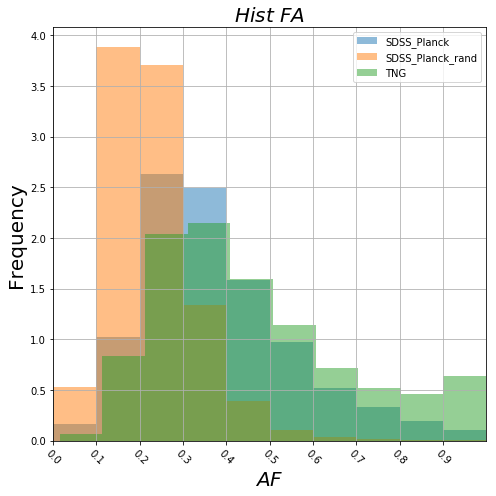

In [9]:
fig= plt.figure(figsize=(7,7))
ax = fig.add_subplot(1, 1, 1)
major_ticks = np.arange(0,1, 0.1)
ax.set_xticks(major_ticks)
ax.grid(which='both')

# plt.hist(fa_sim,ls='dashed', alpha = 0.5,label="Simulation",density=True)
plt.hist(fa_sdss,ls='dotted', alpha = 0.5,label="SDSS_Planck",density=True)
plt.hist(fa_rand,ls='dashed', alpha = 0.5,label="SDSS_Planck_rand",density=True)
plt.hist(fa_TNG,ls='dashed', alpha = 0.5,label="TNG",density=True)
plt.title(r'$Hist\,\,FA$',size=20)
plt.xlabel(r'$AF$',size=20)
plt.ylabel("Frequency",size=20)
plt.xticks(rotation=-45)
plt.tight_layout()
plt.legend()
plt.xlim(0,1)
# plt.savefig("./Figures/hist_fa_comparison.png")
plt.show()

ValueError: operands could not be broadcast together with shapes (56995,) (132263,) 

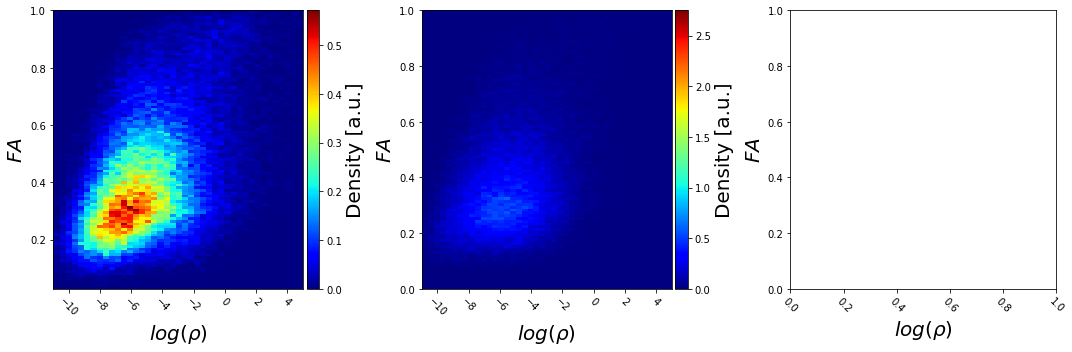

In [5]:
fig = plt.figure(figsize=(15, 5))
plt.jet()

ax = fig.add_subplot(131)     
# ax.set_title(r'$log(\rho)\,vs.\,fa$',size=20)
plt.xlabel(r'$log(\rho)$',size=20)
plt.ylabel(r'$FA$',size=20)
plt.xticks(rotation=-45)
plt.tight_layout()
plt.hist2d(denlog_sim, fa_sim, bins=100, normed=True, norm=mpl.colors.Normalize())
plt.xlim(-11,5)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar=plt.colorbar(cax=cax)
cbar.ax.set_ylabel('Density [a.u.]', size=20)

ax = fig.add_subplot(132)
# plt.title(r'$log(\rho)\,vs.\,fa$',size=20)
plt.xlabel(r'$log(\rho)$',size=20)
plt.ylabel(r'$FA$',size=20)
plt.xticks(rotation=-45)
plt.tight_layout()
plt.hist2d(denlog_sdss, fa_sdss, bins=100, normed=True,norm=mpl.colors.Normalize())
plt.xlim(-11,5)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar=plt.colorbar(cax=cax)
cbar.ax.set_ylabel('Density [a.u.]', size=20)

ax = fig.add_subplot(133)
plt.xlabel(r'$log(\rho)$',size=20)
plt.ylabel(r'$FA$',size=20)
plt.xticks(rotation=-45)
plt.tight_layout()
plt.hist2d(denlog_rand, fa_rand, bins=100, normed=True,norm=mpl.colors.Normalize())
plt.xlim(-11,5)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar=plt.colorbar(cax=cax)
cbar.ax.set_ylabel('Density [a.u.]', size=20)

# plt.savefig("./Figures/hist2d_fa_comparison.png")
fig.tight_layout()
plt.tight_layout()
plt.show()